<a href="https://colab.research.google.com/github/iamemc/PD_01/blob/main/PD_202021_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining / Prospeção de Dados

## Diogo Soares and Sara C. Madeira, 2020/21

# Project 1 - Pattern Mining

## Logistics 
**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

**TASK 3 - Spring vs Summer Purchases** must be done only by groups of 3 people.

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of `March, 28th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P1.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools



In this project you will analyse data from an online Store collected over 4 months (April - July 2014). The folder `data` contains three files that you should use to obtain the dataset to be used in pattern mining. 

The file `store-buys.dat` comprises the buy events of the users over the items. It contains **318.444 sessions**. Each record/line in the file has the following fields (with this order): 

* **Session ID** - the id of the session. In one session there are one or many buying events. Could be represented as an integer number.
* **Timestamp** - the time when the buy occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
* **Item ID** – the unique identifier of item that has been bought. Could be represented as an integer number. 
* **Price** – the price of the item. Could be represented as an integer number.
* **Quantity** – the quantity in this buying.  Could be represented as an integer number.

The file `store-clicks.dat` comprises the clicks of the users over the items. It contains **5.613.499 sessions**.  Each record/line in the file has the following fields (with this order):

* **Session ID** – the id of the session. In one session there are one or many clicks. Could be represented as an integer number.
* **Timestamp** – the time when the click occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
* **Item ID** – the unique identifier of the item that has been clicked. Could be represented as an integer number.
* **Context** – the context of the click. The value "S" indicates a special offer, "0" indicates  a missing value, a number between 1 to 12 indicates a real category identifier,
any other number indicates a brand. E.g. if an item has been clicked in the context of a promotion or special offer then the value will be "S", if the context was a brand i.e BOSCH,
then the value will be an 8-10 digits number. If the item has been clicked under regular category, i.e. sport, then the value will be a number between 1 to 12. 
 
The file `products.csv` comprises the list of products sold by the online store. It contains **46.294 different products** associated with **123 different subcategories**. Each record/line in the file has the following fields:

* **Item ID** - the unique identifier of the item. Could be represented as an integer number. 
* **Product Categories** - the category and subcategories of the item. It is a string containing the category and subcategories of the item. Eg. `appliances.kitchen.juice`


In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[MLxtend](http://rasbt.github.io/mlxtend/)**. When using MLxtend, frequent patterns can either be discovered using `Apriori` and `FP-Growth`. **Choose the pattern mining algorithm to be used.** 


## Team Identification

**GROUP PD03**

Students:

* Eduardo Carvalho - nº55881
* Filipe Santos - nº55142
* Ivo Oliveira - nº50301

## 1. Mining Frequent Itemsets and Association Rules


In this first part of the project you should load and preprocess the dataset  in order to compute frequent itemsets and generate association rules considering all the sessions.

**In what follows keep the following question in mind and be creative!**

1. What are the most interesting products?
2. What are the most bought products?
3. Which products are bought together?
4. Can you find associations between the clicked products? 
5. Can you find associations highliting that when people buy a product/set of products also buy other product(s)?
6. Can you find associations highliting that when people click in a product/set of products also buy this product(s)?
7. Can you find relevant associated categories? 

### 1.1. Load and Preprocess Data

 **Product quantities were not be considered.**

##Limitations
*Due to a problem in the database quantity (QTY) column, the SessionID that corresponds to an equivalent ID in Buys, was thus considered as a purchase. Altough this skews the expected results, the fact some buys had quantities of 0 and other problems, this was a temporarly, yet accurate metric of products and their given clicks and purchases*


In [1]:
#!pip install mlxtend
!pip install mlxtend --upgrade

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib.collections import QuadMesh
from matplotlib.text import Text
from matplotlib.colors import LogNorm
import seaborn as sns
import tkinter as tkr
from mlxtend.preprocessing import  TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
products=pd.read_csv('/content/drive/MyDrive/Datasets/projetoPD/products.csv',
                     header=None,
                     names=['ItemID','Category'],
                     dtype={'ItemID': np.int32, 'Category':str})
buys=pd.read_csv('/content/drive/MyDrive/Datasets/projetoPD/store-buys.dat', 
                 header=None,
                 names=['SessionID','TimeStamp','ItemID','Price','Qty'],
                 dtype={'SessionID':np.int32, 'TimeStamp':str, 'ItemID': np.int32, 
                        'Price':np.int16, 'Qty':'category'})
clicks=pd.read_csv('/content/drive/MyDrive/Datasets/projetoPD/store-clicks.dat', 
                   header=None,
                   nrows=10352280,
                   names=['SessionID','TimeStamp','ItemID','Context'],
                   dtype={'SessionID':np.int32, 'TimeStamp':str, 'ItemID': np.int32, 
                        'Context':'category'})

In [ ]:
buys = buys.drop(columns=['Qty'])
products.memory_usage(deep=True)
buys.memory_usage(deep=True)
clicks.memory_usage(deep=True)
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10352280 entries, 0 to 10352279
Data columns (total 4 columns):
 #   Column     Dtype   
---  ------     -----   
 0   SessionID  int32   
 1   TimeStamp  object  
 2   ItemID     int32   
 3   Context    category
dtypes: category(1), int32(2), object(1)
memory usage: 167.8+ MB


#Database Corrections
This code segment contains Database corrections of the following:
- products_no_duplicates - removed duplicates
- buys_upd - added product names & season

In [ ]:
"""
DATABASE CORRECTIONS
products_no_duplicates - removed duplicates
buys_upd - added product names & season
"""
products_no_duplicates = products.drop_duplicates().reset_index(drop=True)

buys_upd =pd.merge(buys,products_no_duplicates)
clicks_upd= pd.merge(clicks,products_no_duplicates)

#ignore prices/quantities of 0
#buys_upd = buys_upd[buys_upd.Price>0]
#buys_upd = buys_upd[buys_upd.Qty>0]
#no click_upd ver context=0 (missing value)

product_name_buys=[]
for cat in buys_upd.Category:
  product_name_buys.append(cat.split('.')[-1].replace('_',' ').title())
product_name_clicks=[]
for cat in clicks_upd.Category:
  product_name_clicks.append(cat.split('.')[-1].replace('_',' ').title())
#product_name[:5]

buys_upd['ProductName']= product_name_buys
buys_upd = buys_upd.drop('Category', axis=1)
clicks_upd['ProductName']=product_name_clicks
clicks_upd=clicks_upd.drop('Category', axis=1)

dates_buys =[]
season_buys =[]
dates_clicks =[]
season_clicks =[]

for i in buys_upd["TimeStamp"]:
  dates_buys.append(i[:10])
  if i[5:7] == "04" or i[5:7] == "05":
     season_buys.append("Spring")
  elif i[5:7] == "06" or i[5:7] == "07":
    season_buys.append("Summer")
  else:
    season_buys.append("Other")

for i in clicks_upd["TimeStamp"]:
  dates_clicks.append(i[:10])
  if i[5:7] == "04" or i[5:7] == "05":
     season_clicks.append("Spring")
  elif i[5:7] == "06" or i[5:7] == "07":
    season_clicks.append("Summer")
  else:
    season_clicks.append("Other")

weekday_buys=[]
buys_upd["TimeStamp"] = pd.to_datetime(buys_upd["TimeStamp"])
buys_upd["Weekday_Num"]=buys_upd["TimeStamp"].dt.dayofweek 
for i in buys_upd["Weekday_Num"]:
  if i < 5: 
    weekday_buys.append("Weekday")
  else:
    weekday_buys.append("Weekend")

weekday_clicks=[]
clicks_upd["TimeStamp"] = pd.to_datetime(clicks_upd["TimeStamp"])
clicks_upd["Weekday_Num"]=clicks_upd["TimeStamp"].dt.dayofweek 
for i in clicks_upd["Weekday_Num"]:
  if i < 5: 
    weekday_clicks.append("Weekday")
  else :
    weekday_clicks.append("Weekend")
  
buys_upd = buys_upd.drop(columns=['TimeStamp'])
buys_upd.insert(1, "TimeStamp", dates_buys)
buys_upd["Season"] = season_buys
buys_upd["Weekday"] = weekday_buys
buys_upd.sort_values(by='TimeStamp')

clicks_upd = clicks_upd.drop(columns=['TimeStamp'])
clicks_upd.insert(1, "TimeStamp", dates_clicks)
clicks_upd["Season"] = season_clicks
clicks_upd["Weekday"] = weekday_clicks
#clicks_upd.sort_values(by='TimeStamp')

In [ ]:
buys_upd=buys_upd.sort_values(by='SessionID').reset_index(drop=True)
buys_upd.head()

,SessionID,TimeStamp,ItemID,Price,ProductName,Weekday_Num,Season,Weekday
0,11,2014-04-03,214821371,1046,Blender,3,Spring,Weekday
1,11,2014-04-03,214821371,1046,Blender,3,Spring,Weekday
2,12,2014-04-02,214717867,1778,Bag,2,Spring,Weekday
3,21,2014-04-07,214548744,3141,Skates,0,Spring,Weekday
4,21,2014-04-07,214838503,18745,Clocks,0,Spring,Weekday


In [ ]:
len(buys)-len(buys.drop_duplicates())

135

Existem 135 registos duplicados. Precisamos de os remover para avançar com a análise.

In [ ]:
buys_upd=buys_upd.drop_duplicates().reset_index(drop=True)

619267

In [ ]:
clicks_upd=clicks_upd.sort_values(by='SessionID').reset_index(drop=True)

,SessionID,TimeStamp,ItemID,Context,ProductName,Weekday_Num,Season,Weekday
0,1,2014-04-07,214536502,0,Tablet,0,Spring,Weekday
1,1,2014-04-07,214577561,0,Headphone,0,Spring,Weekday
2,1,2014-04-07,214536506,0,Tablet,0,Spring,Weekday
3,1,2014-04-07,214536500,0,Tablet,0,Spring,Weekday
4,2,2014-04-07,214551617,0,Scales,0,Spring,Weekday


In [ ]:
len(clicks)-len(clicks.drop_duplicates())

23

Existem 23 registos duplicados. Precisamos de os remover para avançar com a análise.

In [ ]:
clicks_upd=clicks_upd.drop_duplicates().reset_index(drop=True)

# Most interesting items?

## Most Clicked Products


In [ ]:
# What are the most interesting items? (most clicked)
most_clicks = clicks_upd.groupby(["ProductName"], as_index=False).count().sort_values(by="SessionID", ascending=False)
most_clicks = most_clicks[['ProductName','SessionID']].reset_index(drop=True)
most_clicks = most_clicks.rename(columns={'SessionID':'Clicks'})
most_clicks.index += 1
print("Table 1.")
most_clicks.head(10)

Table 1.


,ProductName,Clicks
1,Tennis,664834
2,Memory,494996
3,Toster,343325
4,Blender,331917
5,Notebook,209466
6,Meat Grinder,209409
7,Monitor,208220
8,Iron,171817
9,Vacuum,160518
10,Bag,158312


> *The top three most clicked products are Memory Chips, with a total of 71265, followed by Blenders with 56013 and lastly, Meat Grinders with 32859. Below the product purchases will be shown through a a bar graph.*

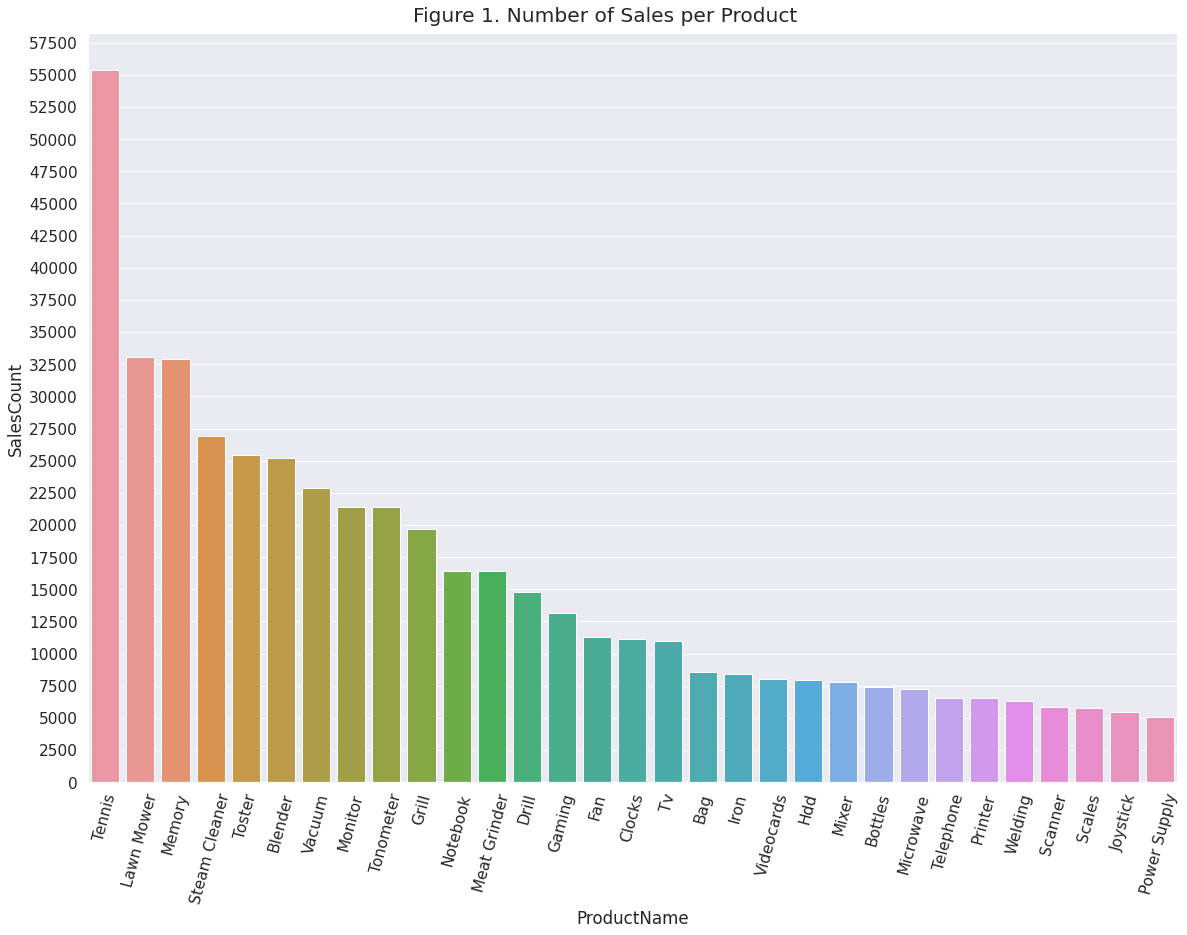

In [ ]:
#2. What are the most bought products?
quantities = buys_upd.groupby(["ProductName"], as_index=False).count().sort_values(by="SessionID", ascending=False)
quantities2 = quantities
quantities = quantities[['ProductName','SessionID']].reset_index(drop=True)
quantities = quantities.rename(columns={'SessionID':'SalesCount'})
quantities.index += 1 

quantities = quantities[quantities.SalesCount>5000]
most_bought = sns.catplot(x="ProductName", y="SalesCount", kind="bar", data = quantities)
most_bought.fig.suptitle('Figure 1. Number of Sales per Product')
for ax in most_bought.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(75)
most_bought.set(yticks=np.arange(0,60000,2500))
most_bought.fig.set_figheight(12.5)
most_bought.fig.set_figwidth(25)

> *The bar graph above, clearly shows the differences between product purchases. Interestingly products with more than 5 thousand sales don't exactly match to the most clicked items as seen in the previous table (Table 1.).
For example, more than 55 thousand Tennis products were sold, however the same product can't be found in the top ten of most clicked online.
The same happens in Lawn Mowers, with around 32.5 thousand sales.
Memory chips, the second most bought has 32.5 thousand sales, that's 45% of the number of respective product clicks of said product.*

In [ ]:
#prepare graph info
quantities2 = buys_upd
quantities2['SessionID'] = 1
daysofWeek={0:'Segunda-Feira',1:'Terça-Feira',2:'Quarta-Feira',3:'Quinta-Feira', 4:'Sexta-Feira',5:'Sábado',6:'Domingo'}
quantities2['Weekday_Num'] = quantities2['Weekday_Num'].map(daysofWeek)
quantities2 = quantities2.groupby(["Weekday_Num","ProductName"], as_index=False)['SessionID'].sum()

drop_column = quantities2.groupby(['ProductName'], as_index=False)['SessionID'].sum()
drop_column = drop_column.sort_values(by='SessionID', ascending=False)
drop_column = drop_column.tail(-20)
drop_column = drop_column['ProductName']

quantities2 = quantities2[~quantities2['ProductName'].isin(drop_column)]
quantities2 = quantities2.sort_values(by='SessionID', ascending=False).reset_index(drop=True)
quantities2 = quantities2.pivot_table(index='Weekday_Num', columns = 'ProductName')['SessionID']
quantities2 = quantities2.reindex(['Segunda-Feira','Terça-Feira', 'Quarta-Feira','Quinta-Feira', 'Sexta-Feira','Sábado','Domingo'])
# ----- get max & min values for graph
hm_vmax = quantities2.max()
hm_vmax = hm_vmax.max()
hm_vmin = quantities2.min()
hm_vmin = hm_vmin.min()
quantities2['Total'] = quantities2.sum(axis=1)

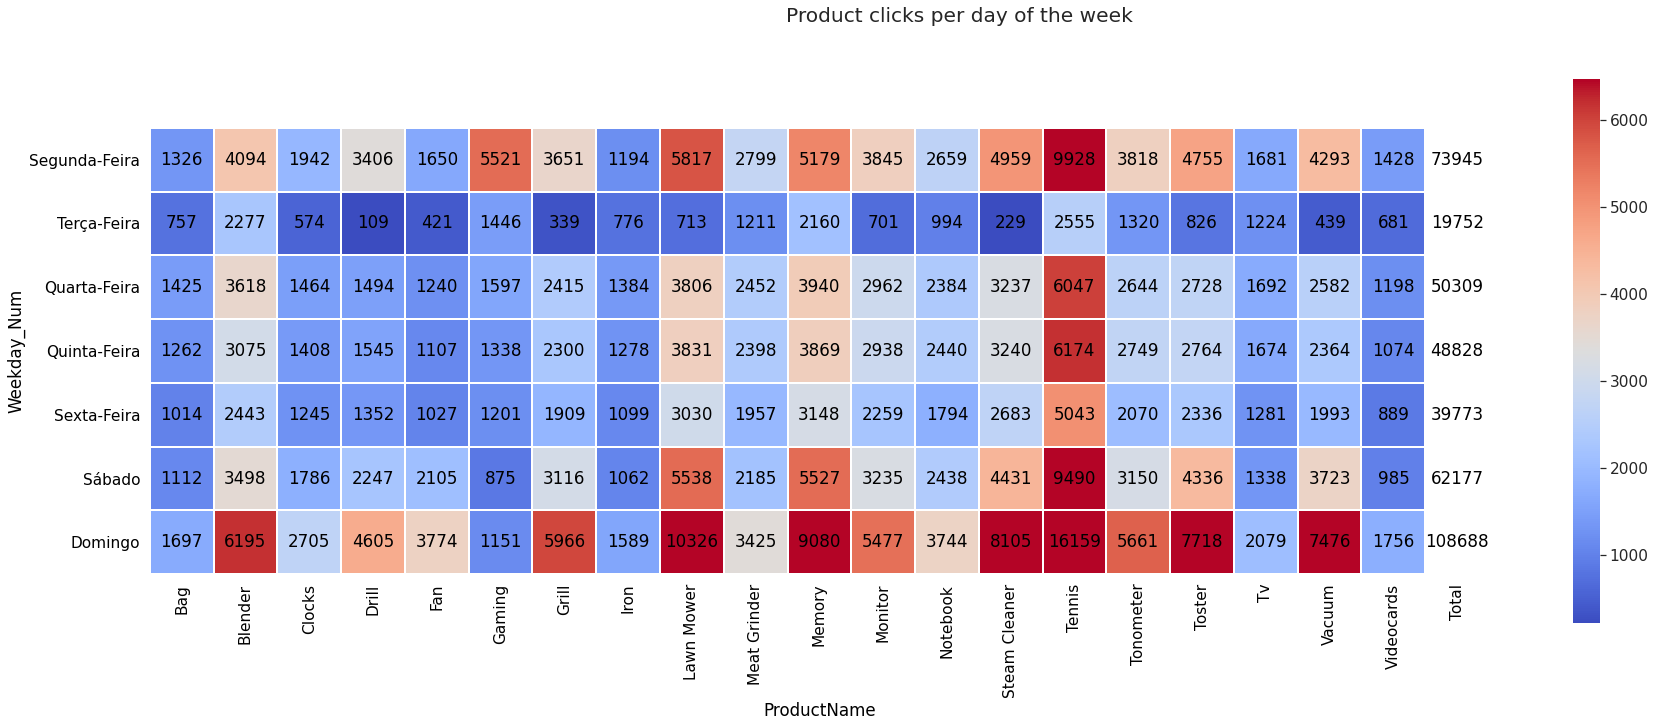

In [ ]:
#process data for heatmap graph
sns.set(font_scale = 1.4)
fig, ax = plt.subplots(figsize=(30,10))
plt.suptitle("Product clicks per day of the week")
sns.heatmap(quantities2, cmap='coolwarm', square=True, linewidths=1, annot=True, fmt="d", vmin=hm_vmin*2, vmax=hm_vmax/2.5)
quadmesh = ax.findobj(QuadMesh)[0] # get array of colors
facecolors = quadmesh.get_facecolors()
facecolors[np.arange(20,147,21)] = np.array([1,1,1,1]) # make colors of the last column white
quadmesh.set_facecolors = facecolors # set modified colors
for i in ax.findobj(Text): # set color of all text to black
    i.set_color('black')

> *Above is an heat map analysis of the 20 most sold products (sorted alphabetically) and their sales per day of the week. This visualization goes on pair with the previous bar graph, and in it we can see the sales dispersion clearly. On the rightmost column is the total number of sales per day.*

>> *Sunday is by far the most popular day, with a total of 109025 sales and with the cells with the higher numbers. Tennis products bought at Sundays which number 16183 are the combination with the higher count.*

>> *Besides Sundays, Saturdays and Mondays are the most popular days of the week to buy online with 62383 and 74115 purchases, respectively. On the opposite end, Tuesday is is the least popular day, with only 19855 purchases.*

>> *As shown before, Tennis products are the most popular, and this is true for any day of the week compared to other products within the same day.*









## 1.2. Compute Frequent Itemsets

> *Due to restraints in processing power, some of the computing was done outside Google Colab, due to this the respective prints and subsequent analysis will be provided and the used code will be posted.*

> *For sake of performance, it was decided to only use fpgrowth as it was the fastest option, as well as using less memory than apriori. From our tests, the result difference was negligenciable*

In [ ]:
#Setting up: Which products are bought together?
all_sessions_buy={}
for i in range(len(buys_upd)):
  all_sessions_buy[buys_upd.SessionID[i]]=[]
for i in range(len(buys_upd)):
  if buys_upd.ProductName[i] not in all_sessions_buy.get(buys_upd.SessionID[i]):
    all_sessions_buy[buys_upd.SessionID[i]].append(buys_upd.ProductName[i])

transactions_buy=list(all_sessions_buy.values())

In [ ]:
#Setting up: Which products are viewed together?
all_sessions_click={}
for i in range(len(clicks_upd)):
  all_sessions_click[clicks_upd.SessionID[i]]=[]
for i in range(len(clicks_upd)):
  if clicks_upd.ProductName[i] not in all_sessions_click.get(clicks_upd.SessionID[i]):
    all_sessions_click[clicks_upd.SessionID[i]].append(clicks_upd.ProductName[i])

transactions_click=list(all_sessions_click.values())

In [ ]:
#Compute binary databases
tr_enc = TransactionEncoder()
#buys
trans_array_buy = tr_enc.fit(transactions_buy).transform(transactions_buy)
binary_database_buy = pd.DataFrame(trans_array_buy, columns = tr_enc.columns_)
#clicks
trans_array_click = tr_enc.fit(transactions_click).transform(transactions_click)
binary_database_click = pd.DataFrame(trans_array_click, columns = tr_enc.columns_)

> Frequent most bought itemsets considering a minimum support of 1%.

In [ ]:
#FP-Growth é melhori que apriori
#buys
frequent_itemsets_fpg_buy = fpgrowth(binary_database_buy, min_support=0.01, use_colnames=True)
frequent_itemsets_fpg_buy['length'] = frequent_itemsets_fpg_buy['itemsets'].apply(lambda x: len(x))
frequent_itemsets_fpg_buy.sort_values(by='support', ascending=False).reset_index()

> **Products Sales - Ordered by Support.**

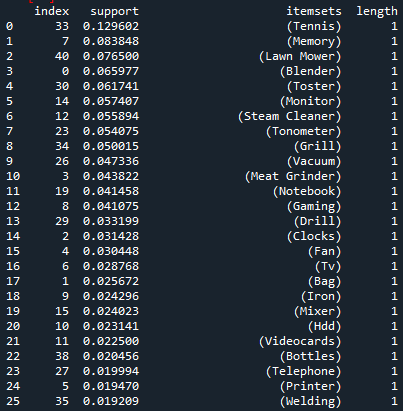

> *As seen in the image above, Tennis products are the most commonly bought single products with 13% Support. Memory Chips are the second with 8% and closely Lawn Mowers with 7.6%.*

In [ ]:
frequent_itemsets_fpg_buy.sort_values(by='length', ascending=False).reset_index()

> **Products Sales - Ordered by Length.**

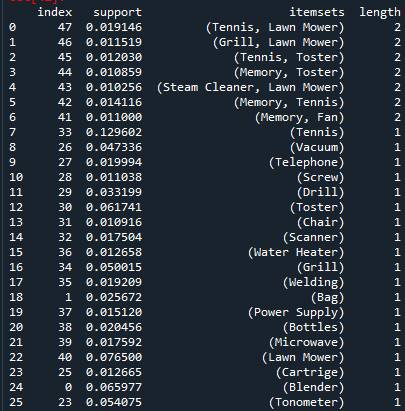

> *In the image above, we can see that for itemsets with a length higher than 2, outdoor related products are the most commonly bought together items. Tennis products and Lawn Mowers are the most bought with almost 2% Support. The outdoor combo of Grills and Lawn Mowers are the second most bought together, with 1.1%*

In [ ]:
frequent_itemsets_fpg_clicks = fpgrowth(binary_database_click, min_support=0.01, use_colnames=True)
frequent_itemsets_fpg_clicks['length'] = frequent_itemsets_fpg_clicks['itemsets'].apply(lambda x: len(x))
frequent_itemsets_fpg_clicks.sort_values(by='length', ascending=False).reset_index()
frequent_itemsets_fpg_clicks[(frequent_itemsets_fpg_clicks['support'] >= 0.01) & (frequent_itemsets_fpg_clicks['length'] >= 2)].sort_values(by='length', ascending=False).reset_index()

**Products Clicks - Ordered by Support and Length >= 2.**

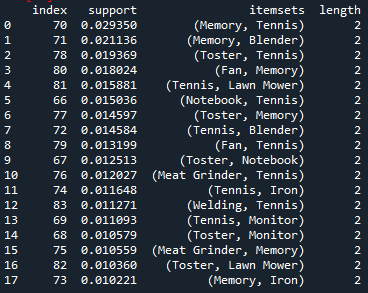

> Interestingly, the most clicked itemsets are not the same as the most bought ones. Memory Chips and Tennis products are the most often clicked per user session with the highest Support of 2.9%. Memory Chips and Blenders are also highly clicked together with 2.1% Support. Followed by Tosters and Tennis with 1.9% Support.

> In contrast with the most bought together products: Tennis and Lawn Mowers, these only appear in the 5th most clicked, with a Support of 1.5%

### Association Rules from Frequent Itemsets



* Generate association rules with a choosed value (C) for minimum confidence. 
* Generate association rules with a choosed value (L) for minimum lift. 
* Generate association rules with both confidence >= C% and lift >= L.
* Change C and L when it makes sense and discuss the results.

In [ ]:
# Generate association rules with confidence >= 90%
rules_buy = association_rules(frequent_itemsets_fpg_buy, metric = "confidence", min_threshold=0.10)
rules_buy_lift = association_rules(frequent_itemsets_fpg_buy, metric="lift", min_threshold=1.2)
rules_buy_lift[(rules_buy_lift['lift'] >= 2)].sort_values(by='lift', ascending=False).reset_index()
rules_buy

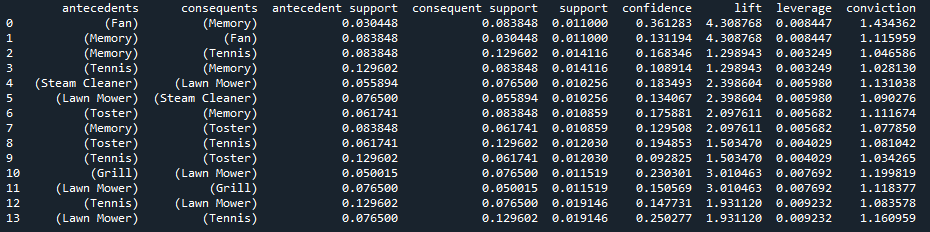

> At first a minimum Lift threshold of 1.2 was used, however this proved to be a few too many, which will be explored below.

> However we can denote a few items that are closely bought together, namely Fans and Memory chips, which overall display the higher confidence, lift and conviction. Altough the support isn't the highest, that is, the given pair doesn't appear that often in the baskets, when they do, they have a strong correlation.

> Given it's high confidence threshold, the implication that it's usually bought together is given as quite truthful. The same is true for the overall lifts of the given output itemsets. Given a Lift higher than 1, this lets us know the degree to which those two occurrences are dependent on one another.

>> This said both Fans and Memory chips strongly correlate with each other, the same is true for the following items, Memort Chips and Tennis, and Steam Cleaners and Lawn Mowers.

In [ ]:
rules_buy_lift[(rules_buy_lift['confidence'] >= 0.15) & (rules_buy_lift['lift'] >= 2)].sort_values(by='lift', ascending=False).reset_index()

**Products Sales - Ordered by Lift and Higher Confidence**

> **Rules:**
> *   Lift >= 2
> *   Confidence >= 15%

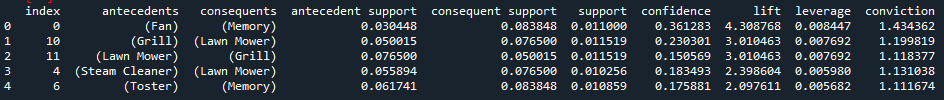



> With higher thresholds than the previous output, we can demonstrate more closely related items.

> Note that grills and Lawn Mowers climbed to 2nd placed given the new criteria.

>> It should be noted that most of the output, except for Grills and Lawn Mowers, is almost identical to the previous one the same except for fewer items that were filtered, but as it was sorted previously, the top itemsets were kept.
>> These top itemsets are the ones we're iterested at, as they are the most commonly bought together, which a store manager or marketing department could take advantage of if discounts or similar promotions are considered in the future.

>> A few things to take in mind is that many outdoor related items are bought, as given the high range of categories provided, this category should be given the most attention of marketing team.

In [ ]:
rules_clicks_lift = association_rules(frequent_itemsets_fpg_clicks, metric="lift", min_threshold=1.2)
rules_clicks_lift[(rules_clicks_lift['lift'] >= 2)].sort_values(by='lift', ascending=False).reset_index()

**Clicks per Session - Ordered by Lift**

> **Rules:**
> *   Lift >= 1.2
> *   Confidence >= 15%

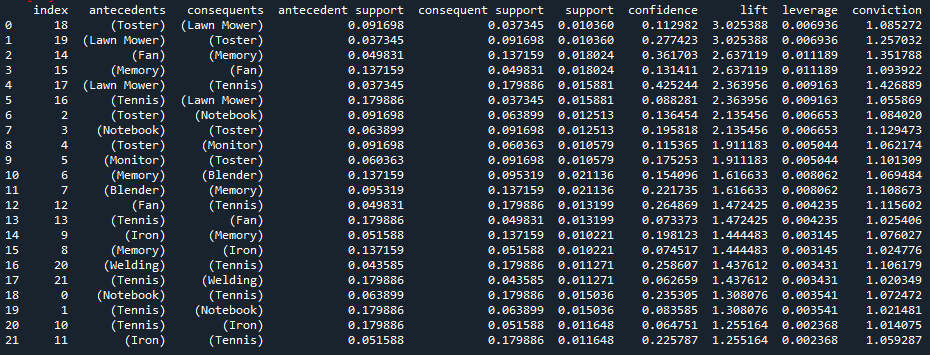

**Clicks per Session - Ordered by Lift**

> **Rules:**
> *   Lift >= 2
> *   Confidence >= 20%



### 1.4. Take a Look at Maximal Patterns: Compute Maximal Frequent Itemsets

### 1.5. Conclusions 

# 2. Week vs Weekend Purchases

In this part of the project you should analyse the consumption patterns during the week vs during the weekeed.

**In what follows keep the following question in mind and be creative!**

1. The most interesting products are the same during the week and the weekend? 
2. What are the most bought products during the week? And during the weekend?
3. There are differences between the sets of products bought during the week and the weekend?
4. Can you find different associations highliting that when people click in a product/set of products also buy this product(s) during the week vs the weekend?
5. Discuss the results obtained for the week sessions vs weekend sessions.

### 2.1. Load and Preprocess Data

 **Product quantities should not be considered.**

### 2.2. Compute Frequent Itemsets

* Compute frequent itemsets considering a minimum support of X%. 
* Present frequent itemsets organized by length (number of items). 
* List frequent 1-itemsets, 2-itemsets, 3-itemsets, etc with support of at least Y%.
* Change X and Y when it makes sense and discuss the results.

### 2.3. Generate Association Rules from Frequent Itemsets

* Generate association rules with a choosed value (C) for minimum confidence. 
* Generate association rules with a choosed value (L) for minimum lift. 
* Generate association rules with both confidence >= C% and lift >= L.
* Change C and L when it makes sense and discuss the results.

### 2.4. Conclusions 

# 3. [Only Groups of 3] Spring vs Summer Purchases

In this part of the project you should analyse the consumption patterns during the Spring months (April and May) vs Summer months (June and July).

**In what follows keep the following question in mind and be creative!**

1. The most interesting products are the same during the Spring and the Summer? 
2. What are the most bought products during the Spring? And during the Summer?
3. There are differences between the sets of products bought during the Spring and the Summer?
4. Can you find different associations highliting that when people click in a product/set of products also buy this product(s) during the Spring vs the Summer?
5. Discuss the results obtained for the Spring sessions vs Summer sessions.

### 3.1. Load and Preprocess Data

 **Product quantities should not be considered.**

In [2]:
item_cat={}
with open('/content/drive/MyDrive/Datasets/projetoPD/products.csv',
          newline='') as csvfile:
          
          reader = csv.DictReader(csvfile,
                                  fieldnames=['ItemID','Category'])
          for row in reader:
            item_cat[row['ItemID']]=row['Category'].split('.')[-1].capitalize()

### List of Summer transactions

In [3]:
summer_dict={}
with open('/content/drive/MyDrive/Datasets/projetoPD/store-buys.dat',
          newline='') as csvfile:

          reader = csv.DictReader(csvfile,
                                  fieldnames=['SessionID','TimeStamp',
                                              'ItemID','Price','Qty'])
          for row in reader:
            if row['TimeStamp']>='2014-06-01' and row['TimeStamp']<'2014-08-01':
              if row['SessionID'] not in summer_dict:
                summer_dict[row['SessionID']]=[]
              else:
                if item_cat[row['ItemID']] not in summer_dict[row['SessionID']]:
                  summer_dict[row['SessionID']].append(item_cat[row['ItemID']])

nulls=[]
for session, item in summer_dict.items():
  if item==[]:
    nulls.append(session)

for id in nulls:
  if id in summer_dict.keys():
    del summer_dict[id]

summer_buys=list(summer_dict.values())
summer_buys[:3]

[['Toster', 'Memory'], ['Monitor'], ['Meat_grinder']]

### List of Spring transactions

In [4]:
spring_dict={}
with open('/content/drive/MyDrive/Datasets/projetoPD/store-buys.dat',
          newline='') as csvfile:

          reader = csv.DictReader(csvfile,
                                  fieldnames=['SessionID','TimeStamp',
                                              'ItemID','Price','Qty'])
          for row in reader:
            if row['TimeStamp']>='2014-04-01' and row['TimeStamp']<'2014-06-01':
              if row['SessionID'] not in spring_dict:
                spring_dict[row['SessionID']]=[]
              else:
                if item_cat[row['ItemID']] not in spring_dict[row['SessionID']]:
                  spring_dict[row['SessionID']].append(item_cat[row['ItemID']])

nulls=[]
for session, item in spring_dict.items():
  if item==[]:
    nulls.append(session)

for id in nulls:
  if id in spring_dict.keys():
    del spring_dict[id]

spring_buys=list(spring_dict.values())
spring_buys[:3]

[['Router'], ['Toster'], ['Telephone', 'Pillow', 'Cpu', 'Scales']]

### List of Summer Clicks

In [5]:
summer_dict={}
with open('/content/drive/MyDrive/Datasets/projetoPD/store-clicks.dat',
          newline='') as csvfile:

          reader = csv.DictReader(csvfile,
                                  fieldnames=['SessionID','TimeStamp',
                                              'ItemID','Context'])
          for row in reader:
            if row['TimeStamp']>='2014-06-01' and row['TimeStamp']<'2014-08-01':
              if row['SessionID'] not in summer_dict:
                summer_dict[row['SessionID']]=[]
              else:
                if item_cat[row['ItemID']] not in summer_dict[row['SessionID']]:
                  summer_dict[row['SessionID']].append(item_cat[row['ItemID']])

nulls=[]
for session, item in summer_dict.items():
  if item==[]:
    nulls.append(session)

for id in nulls:
  if id in summer_dict.keys():
    del summer_dict[id]

summer_clicks=list(summer_dict.values())
summer_clicks[:3]

[['Notebook', 'Clocks', 'Cultivator', 'Iron'],
 ['Monitor', 'Tonometer'],
 ['Monitor']]

### List of Spring Clicks

In [6]:
spring_dict={}
with open('/content/drive/MyDrive/Datasets/projetoPD/store-clicks.dat',
          newline='') as csvfile:

          reader = csv.DictReader(csvfile,
                                  fieldnames=['SessionID','TimeStamp',
                                              'ItemID','Context'])
          for row in reader:
            if row['TimeStamp']>='2014-04-01' and row['TimeStamp']<'2014-06-01':
              if row['SessionID'] not in spring_dict:
                spring_dict[row['SessionID']]=[]
              else:
                if item_cat[row['ItemID']] not in spring_dict[row['SessionID']]:
                  spring_dict[row['SessionID']].append(item_cat[row['ItemID']])

nulls=[]
for session, item in spring_dict.items():
  if item==[]:
    nulls.append(session)

for id in nulls:
  if id in spring_dict.keys():
    del spring_dict[id]

spring_clicks=list(spring_dict.values())
spring_clicks[:3]

[['Tablet', 'Headphone'],
 ['Table', 'Smartphone', 'Refrigerators', 'Scales'],
 ['Cpu', 'Notebook']]

### 3.2. Compute Frequent Itemsets

* Compute frequent itemsets considering a minimum support of X%. 
* Present frequent itemsets organized by length (number of items). 
* List frequent 1-itemsets, 2-itemsets, 3-itemsets, etc with support of at least Y%.
* Change X and Y when it makes sense and discuss the results.

### Summer Sales

In [7]:
# Binary Database
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(summer_buys).transform(summer_buys)
summer_buys_binary = pd.DataFrame(trans_array, columns=tr_enc.columns_)

# FP-Growth
frequent_summer_buys=fpgrowth(summer_buys_binary, min_support=0.01,use_colnames=True)
frequent_summer_buys['length'] = frequent_summer_buys['itemsets'].apply(lambda x: len(x))
frequent_summer_buys=frequent_summer_buys.sort_values(by=['length','support'], ascending=False)
frequent_summer_buys=frequent_summer_buys.reset_index(drop=True)
frequent_summer_buys.index+=1

# only 2 and 3 itemsets
itemsets_summer_buys=frequent_summer_buys[frequent_summer_buys['length']>1]
itemsets_summer_buys=itemsets_summer_buys.reset_index(drop=True)
itemsets_summer_buys.index+=1
itemsets_summer_buys

,support,itemsets,length
1,0.029238,"(Lawn_mower, Grill)",2
2,0.025579,"(Steam_cleaner, Lawn_mower)",2
3,0.021220,"(Drill, Steam_cleaner)",2
4,0.018603,"(Vacuum, Grill)",2
5,0.016176,"(Drill, Lawn_mower)",2
6,0.015350,"(Tonometer, Grill)",2
7,0.013889,"(Steam_cleaner, Grill)",2
8,0.013101,"(Toster, Vacuum)",2
9,0.012249,"(Toster, Memory)",2
10,0.012160,"(Drill, Grill)",2


### Spring Sales

In [8]:
# Binary database
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(spring_buys).transform(spring_buys)
spring_buys_binary = pd.DataFrame(trans_array, columns=tr_enc.columns_)

# FP-Growth
frequent_spring_buys=fpgrowth(spring_buys_binary, min_support=0.01,use_colnames=True)
frequent_spring_buys['length'] = frequent_spring_buys['itemsets'].apply(lambda x: len(x))
frequent_spring_buys=frequent_spring_buys.sort_values(by=['length','support'], ascending=False)
frequent_spring_buys=frequent_spring_buys.reset_index(drop=True)
frequent_spring_buys.index+=1

# only 2 and 3 itemsets
itemsets_spring_buys=frequent_spring_buys[frequent_spring_buys['length']>1]
itemsets_spring_buys=itemsets_spring_buys.reset_index(drop=True)
itemsets_spring_buys.index+=1
itemsets_spring_buys

,support,itemsets,length
1,0.032239,"(Lawn_mower, Tennis)",2
2,0.024661,"(Memory, Tennis)",2
3,0.020307,"(Memory, Fan)",2
4,0.019178,"(Memory, Blender)",2
5,0.016114,"(Toster, Tennis)",2
6,0.014363,"(Toster, Memory)",2
7,0.012589,"(Fan, Tennis)",2
8,0.010585,"(Tennis, Blender)",2
9,0.010113,"(Monitor, Tennis)",2


### Summer Clicks

In [9]:
# Binary database
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(summer_clicks).transform(summer_clicks)
summer_clicks_binary = pd.DataFrame(trans_array, columns=tr_enc.columns_)

# FP-Growth
frequent_summer_clicks=fpgrowth(summer_clicks_binary, min_support=0.01,use_colnames=True)
frequent_summer_clicks['length'] = frequent_summer_clicks['itemsets'].apply(lambda x: len(x))
frequent_summer_clicks=frequent_summer_clicks.sort_values(by=['length','support'], ascending=False)
frequent_summer_clicks=frequent_summer_clicks.reset_index(drop=True)
frequent_summer_clicks.index+=1

# only 2 and 3 itemsets
itemsets_summer_clicks=frequent_summer_clicks[frequent_summer_clicks['length']>1]
itemsets_summer_clicks=itemsets_summer_clicks.reset_index(drop=True)
itemsets_summer_clicks.index+=1
itemsets_summer_clicks

,support,itemsets,length
1,0.016855,"(Steam_cleaner, Lawn_mower)",2
2,0.016253,"(Tennis, Tonometer)",2
3,0.015978,"(Lawn_mower, Grill)",2
4,0.014895,"(Monitor, Tennis)",2
5,0.014628,"(Drill, Steam_cleaner)",2
6,0.013489,"(Monitor, Tonometer)",2
7,0.013375,"(Tonometer, Grill)",2
8,0.012818,"(Tennis, Grill)",2
9,0.011386,"(Steam_cleaner, Grill)",2


### Spring Clicks

In [10]:
# Binary database
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(spring_clicks).transform(spring_clicks)
spring_clicks_binary = pd.DataFrame(trans_array, columns=tr_enc.columns_)

# FP-Growth
frequent_spring_clicks=fpgrowth(spring_clicks_binary, min_support=0.01,use_colnames=True)
frequent_spring_clicks['length'] = frequent_spring_clicks['itemsets'].apply(lambda x: len(x))
frequent_spring_clicks=frequent_spring_clicks.sort_values(by=['length','support'], ascending=False)
frequent_spring_clicks=frequent_spring_clicks.reset_index(drop=True)
frequent_spring_clicks.index+=1

# only 2 and 3 itemsets
itemsets_spring_clicks=frequent_spring_clicks[frequent_spring_clicks['length']>1]
itemsets_spring_clicks=itemsets_spring_clicks.reset_index(drop=True)
itemsets_spring_clicks.index+=1
itemsets_spring_clicks

,support,itemsets,length
1,0.020973,"(Memory, Tennis)",2
2,0.014714,"(Memory, Blender)",2
3,0.013683,"(Toster, Tennis)",2
4,0.011585,"(Toster, Memory)",2
5,0.011573,"(Memory, Fan)",2
6,0.010623,"(Notebook, Tennis)",2
7,0.010334,"(Lawn_mower, Tennis)",2
8,0.010200,"(Tennis, Blender)",2
9,0.010180,"(Monitor, Tennis)",2


### 3.3. Generate Association Rules from Frequent Itemsets

* Generate association rules with a choosed value (C) for minimum confidence. 
* Generate association rules with a choosed value (L) for minimum lift. 
* Generate association rules with both confidence >= C% and lift >= L.
* Change C and L when it makes sense and discuss the results.

### Summer Sales

In [11]:
# Generate association rules with confidence >= 17.5%
rules_summer_buys = association_rules(frequent_summer_buys, 
                                      metric = "confidence", 
                                      min_threshold=0.175)

rules_summer_buys[['antecedents','consequents',
                   'support','confidence','lift']]\
                  .sort_values(by=['confidence','lift'],
                               ascending=False)\
                  .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Drill),(Steam_cleaner),0.021220,0.261387,1.931876
1,(Grill),(Lawn_mower),0.029238,0.237168,1.624847
2,(Memory),(Toster),0.012249,0.212101,2.640294
3,(Lawn_mower),(Grill),0.029238,0.200313,1.624847
4,(Drill),(Lawn_mower),0.016176,0.199249,1.365063
5,(Vacuum),(Grill),0.018603,0.197172,1.599363
6,(Steam_cleaner),(Lawn_mower),0.025579,0.189050,1.295188
7,(Lawn_mower),(Steam_cleaner),0.025579,0.175242,1.295188


In [12]:
# Generate association rules with lift >= 1.7
rules_summer_buys = association_rules(frequent_summer_buys, 
                                      metric = "lift", 
                                      min_threshold=1.7)

rules_summer_buys[['antecedents','consequents',
                   'support','confidence','lift']]\
                  .sort_values(by=['lift', 'confidence'],
                               ascending=False)\
                  .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Memory),(Toster),0.012249,0.212101,2.640294
1,(Toster),(Memory),0.012249,0.152483,2.640294
2,(Steam_cleaner),(Drill),0.021220,0.156837,1.931876
3,(Drill),(Steam_cleaner),0.021220,0.261387,1.931876
4,(Toster),(Vacuum),0.013101,0.163081,1.728508
5,(Vacuum),(Toster),0.013101,0.138855,1.728508


In [13]:
# both metrics combined
all_summer_buys=rules_summer_buys[rules_summer_buys['confidence']>=0.175]
all_summer_buys[['antecedents','consequents',
                   'support','confidence','lift']]\
                   .sort_values(by=['confidence','lift'], ascending=False)\
                   .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Drill),(Steam_cleaner),0.021220,0.261387,1.931876
1,(Memory),(Toster),0.012249,0.212101,2.640294


### Spring Sales

In [14]:
# Generate association rules with confidence >= 20%
rules_spring_buys = association_rules(frequent_spring_buys, 
                                      metric = "confidence", 
                                      min_threshold=0.2)

rules_spring_buys[['antecedents','consequents',
                   'support','confidence','lift']]\
                  .sort_values(by=['confidence','lift'],
                               ascending=False)\
                  .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Lawn_mower),(Tennis),0.032239,0.526227,2.582032
1,(Fan),(Memory),0.020307,0.349524,2.438160
2,(Fan),(Tennis),0.012589,0.216693,1.063246
3,(Monitor),(Tennis),0.010113,0.215884,1.059276
4,(Toster),(Tennis),0.016114,0.205072,1.006224


In [15]:
# Generate association rules with lift >= 2
rules_spring_buys = association_rules(frequent_spring_buys, 
                                      metric = "lift", 
                                      min_threshold=2)

rules_spring_buys[['antecedents','consequents',
                   'support','confidence','lift']]\
                  .sort_values(by=['lift', 'confidence'],
                               ascending=False)\
                  .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Lawn_mower),(Tennis),0.032239,0.526227,2.582032
1,(Tennis),(Lawn_mower),0.032239,0.158189,2.582032
2,(Fan),(Memory),0.020307,0.349524,2.438160
3,(Memory),(Fan),0.020307,0.141652,2.438160


In [16]:
# both metrics combined
all_spring_buys=rules_spring_buys[rules_spring_buys['confidence']>=0.2]
all_spring_buys[['antecedents','consequents',
                   'support','confidence','lift']]\
                   .sort_values(by=['confidence','lift'], ascending=False)\
                   .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Lawn_mower),(Tennis),0.032239,0.526227,2.582032
1,(Fan),(Memory),0.020307,0.349524,2.438160


### Summer Clicks

In [17]:
# Generate association rules with confidence >= 17%
rules_summer_clicks = association_rules(frequent_summer_clicks, 
                                      metric = "confidence", 
                                      min_threshold=0.17)

rules_summer_clicks[['antecedents','consequents',
                     'support','confidence','lift']]\
                  .sort_values(by=['confidence','lift'],
                               ascending=False)\
                  .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Drill),(Steam_cleaner),0.014628,0.216520,2.042002
1,(Lawn_mower),(Steam_cleaner),0.016855,0.184429,1.739350
2,(Grill),(Lawn_mower),0.015978,0.182697,1.999111
3,(Monitor),(Tennis),0.014895,0.178820,1.847021
4,(Lawn_mower),(Grill),0.015978,0.174829,1.999111


In [18]:
# Generate association rules with lift >= 1.8
rules_summer_clicks = association_rules(frequent_summer_clicks, 
                                      metric = "lift", 
                                      min_threshold=1.8)

rules_summer_clicks[['antecedents','consequents',
                     'support','confidence','lift']]\
                  .sort_values(by=['lift', 'confidence'],
                               ascending=False)\
                  .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Drill),(Steam_cleaner),0.014628,0.216520,2.042002
1,(Steam_cleaner),(Drill),0.014628,0.137954,2.042002
2,(Lawn_mower),(Grill),0.015978,0.174829,1.999111
3,(Grill),(Lawn_mower),0.015978,0.182697,1.999111
4,(Monitor),(Tennis),0.014895,0.178820,1.847021
5,(Tennis),(Monitor),0.014895,0.153850,1.847021


In [19]:
# both metrics combined
all_summer_clicks=rules_summer_clicks[rules_summer_clicks['confidence']>=0.17]
all_summer_clicks[['antecedents','consequents',
                   'support','confidence','lift']]\
                   .sort_values(by=['confidence','lift'], ascending=False)\
                   .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Drill),(Steam_cleaner),0.014628,0.216520,2.042002
1,(Grill),(Lawn_mower),0.015978,0.182697,1.999111
2,(Monitor),(Tennis),0.014895,0.178820,1.847021
3,(Lawn_mower),(Grill),0.015978,0.174829,1.999111


### Spring Clicks

In [20]:
# Generate association rules with confidence >= 19%
rules_spring_clicks = association_rules(frequent_spring_clicks, 
                                      metric = "confidence", 
                                      min_threshold=0.19)

rules_spring_clicks[['antecedents','consequents',
                     'support','confidence','lift']]\
                  .sort_values(by=['confidence','lift'],
                               ascending=False)\
                  .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Lawn_mower),(Tennis),0.010334,0.340184,2.358096
1,(Fan),(Memory),0.011573,0.316684,2.872453
2,(Blender),(Memory),0.014714,0.195126,1.769875
3,(Notebook),(Tennis),0.010623,0.194090,1.345398
4,(Memory),(Tennis),0.020973,0.190234,1.318670


In [21]:
# Generate association rules with lift >= 1.7
rules_spring_clicks = association_rules(frequent_spring_clicks, 
                                      metric = "lift", 
                                      min_threshold=1.7)

rules_spring_clicks[['antecedents','consequents',
                     'support','confidence','lift']]\
                  .sort_values(by=['lift', 'confidence'],
                               ascending=False)\
                  .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Fan),(Memory),0.011573,0.316684,2.872453
1,(Memory),(Fan),0.011573,0.104970,2.872453
2,(Lawn_mower),(Tennis),0.010334,0.340184,2.358096
3,(Tennis),(Lawn_mower),0.010334,0.071631,2.358096
4,(Blender),(Memory),0.014714,0.195126,1.769875
5,(Memory),(Blender),0.014714,0.133460,1.769875


In [22]:
# both metrics combined
all_spring_clicks=rules_spring_clicks[rules_spring_clicks['confidence']>=0.19]
all_spring_clicks[['antecedents','consequents',
                   'support','confidence','lift']]\
                   .sort_values(by=['confidence','lift'], ascending=False)\
                   .reset_index(drop=True)

,antecedents,consequents,support,confidence,lift
0,(Lawn_mower),(Tennis),0.010334,0.340184,2.358096
1,(Fan),(Memory),0.011573,0.316684,2.872453
2,(Blender),(Memory),0.014714,0.195126,1.769875


### 3.4. Conclusions 

## 4. Conclusions
Draw some conclusions about this project work.